In [12]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.model_selection import cross_validate
from sklearn.datasets import make_regression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
import cv2
import joblib 
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn import metrics
data = pd.read_csv("pixel_values2.0.csv")
data = shuffle(data)
data

,Folder,Pixel1,Pixel2,Pixel3,Pixel4,Pixel5,Pixel6,Pixel7,Pixel8,Pixel9,...,Pixel775,Pixel776,Pixel777,Pixel778,Pixel779,Pixel780,Pixel781,Pixel782,Pixel783,Pixel784
51,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
483,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
386,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
243,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
460,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
248,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
200,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
79,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [13]:
X = data.drop(["Folder"], axis=1)
Y =data["Folder"]

# Preview of One image using matplotlib

5


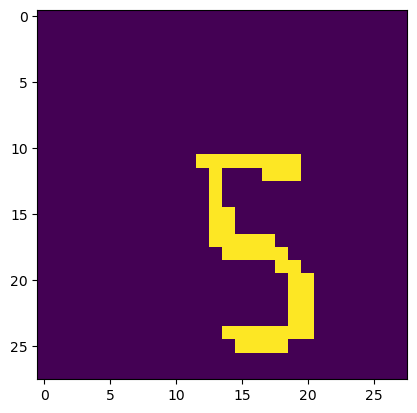

In [14]:
idx = 542
img = X.loc[idx].values.reshape(28,28)
print(Y[idx])
plt.imshow(img)

# Train-test split

In [138]:
train_x,test_x,train_y,test_y = train_test_split(X,Y, test_size = 0.2)

# Fit the model using svc and also to save the model using joblib

In [139]:
classifier=SVC(kernel="linear", random_state=6)
classifier.fit(train_x,train_y)
joblib.dump(classifier, "digit_recogniser")

['digit_recogniser']

# Calculate Accuracy

In [140]:
prediction = classifier.predict(test_x)
print("Accuracy = ", metrics.accuracy_score(prediction, test_y))

Accuracy =  0.8118811881188119


# Comprehensive Tests

Precision = 0.8381585685791808
Recall = 0.8267326732673267
F1 Score = 0.8269610794213741
Accuracy = 0.8267326732673267


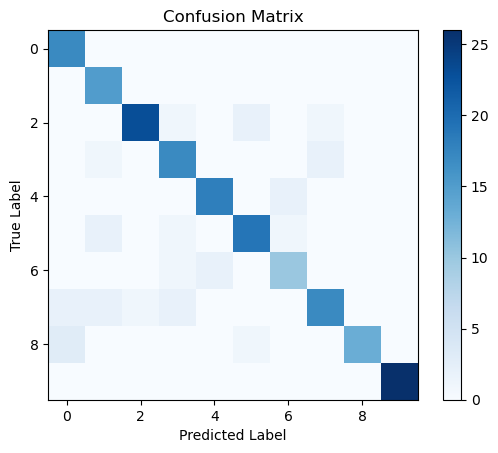

Confusion Matrix:
[[17  0  0  0  0  0  0  0  0  0]
 [ 0 15  0  0  0  0  0  0  0  0]
 [ 0  0 23  1  0  2  0  1  0  0]
 [ 0  1  0 17  0  0  0  2  0  0]
 [ 0  0  0  0 18  0  2  0  0  0]
 [ 0  2  0  1  0 19  1  0  0  0]
 [ 0  0  0  1  2  0 10  0  0  0]
 [ 2  2  1  2  0  0  0 17  0  0]
 [ 3  0  0  0  0  1  0  0 13  0]
 [ 0  0  0  0  0  0  0  0  0 26]]
Cross-Validation Accuracy: 0.8544554455445544


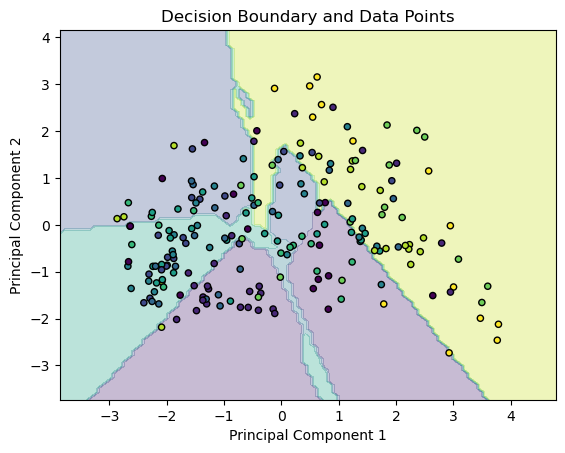

In [199]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn import metrics
import pandas as pd
from sklearn.utils import shuffle
import joblib

# Load data
data = pd.read_csv("pixel_values2.0.csv")
data = shuffle(data)

X = data.drop(["Folder"], axis=1)
Y = data["Folder"]

# Split data
train_x, test_x, train_y, test_y = train_test_split(X, Y, test_size=0.2)

# Train SVM
classifier = SVC(kernel="linear", random_state=6)
classifier.fit(train_x, train_y)

# Save model
joblib.dump(classifier, "digit_recogniser")

# Predict
prediction = classifier.predict(test_x)

# Calculate precision, recall, and F1 score
precision = metrics.precision_score(test_y, prediction, average='weighted')
recall = metrics.recall_score(test_y, prediction, average='weighted')
f1_score = metrics.f1_score(test_y, prediction, average='weighted')

print("Precision =", metrics.precision_score(test_y, prediction, average='weighted'))
print("Recall =", metrics.recall_score(test_y, prediction, average='weighted'))
print("F1 Score =", metrics.f1_score(test_y, prediction, average='weighted'))
print("Accuracy =", metrics.accuracy_score(prediction, test_y))
# Plot confusion matrix
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

print("Confusion Matrix:")
print(cm)
# Perform cross-validation
cv_scores = cross_val_score(classifier, X, Y, cv=5)

# Print average accuracy
print("Cross-Validation Accuracy:", np.mean(cv_scores))

# Apply PCA to reduce dimensionality for visualization
pca = PCA(n_components=2)
train_x_pca = pca.fit_transform(train_x)
test_x_pca = pca.transform(test_x)

# Train SVM
classifier = SVC(kernel="linear", random_state=6)
classifier.fit(train_x_pca, train_y)

# Plot decision boundary and data points
def plot_decision_boundary(X, y, model):
    # Create a meshgrid of points covering the feature space
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                         np.linspace(y_min, y_max, 100))

    # Predict the class labels for the points in the meshgrid
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Plot the decision boundary
    plt.contourf(xx, yy, Z, alpha=0.3)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', s=20)
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.title('Decision Boundary and Data Points')
    plt.show()

plot_decision_boundary(test_x_pca, test_y, classifier)